# Protein Synthesis Simulation

Load dataset:

In [1]:
from HumanGenomeDataset.load_dataset import load_dataset

data_df = load_dataset('dna_protein_coding_sequences')
data_df.head(2)

c:\Users\giuli\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


ID                                           sequence category
0  NM_001368254.1  GCTGAGCTGAGCTGGGGCGCAGCCGCCTGTCTGCACCGGCAGCACC...       NM
1  NM_001350977.1  TCCACAACTGAAACATCCACTTCTGAACACCATGTCCTACTACAGC...       NM

### Simulation

In [2]:
from src.simulation import ProteinSinthesisProcess

In [3]:
import random
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

# Simulation parameters
SIM_TIME = 3600*12 # 12 hours
NUMBER_RESOURCES = 1e+4
NUMBER_RNA_POLYMERASES = 200
NUMBER_RIBOSOMES = 50
NUMBER_RNA_TRANSFER = 800
URACIL_INITIAL_AMOUNT = random.randint(3e+4, 5e+4)
ADENINE_INITIAL_AMOUNT = random.randint(4e+4, 6e+4)
GUANINE_INITIAL_AMOUNT = random.randint(3e+4, 5e+4)
CYTOSINE_INITIAL_AMOUNT = random.randint(3e+4, 5e+4)

In [4]:
protein_synthesis_process = ProteinSinthesisProcess(
    dna_sequences_df=data_df,
    number_resources=NUMBER_RESOURCES,
    number_rna_polymerases=NUMBER_RNA_POLYMERASES, 
    number_ribosomes=NUMBER_RIBOSOMES,
    number_rna_transfers_per_codon=NUMBER_RNA_TRANSFER,
    uracil_initial_amount=URACIL_INITIAL_AMOUNT,
    adenine_initial_amount=ADENINE_INITIAL_AMOUNT,
    guanine_initial_amount=GUANINE_INITIAL_AMOUNT,
    cytosine_initial_amount=CYTOSINE_INITIAL_AMOUNT,
    random_seed=RANDOM_SEED,
    verbose=True
    )

Simulation environment initialized, time unit: 0.0001 second.


In [5]:
print(protein_synthesis_process)

Protein Sinthesis Process:
185310 dna sequences to synthesize,
10000.0 resources available,
200 RNA polymerases,
50 ribosomes,
33648 uracil bases,
40819 adenine bases,
39012 guanine bases,
38024 cytosine bases.


In [6]:
print(repr(protein_synthesis_process))

Protein Sinthesis Process:
185310 dna sequences to synthesize,
10000.0 resources available,
200 RNA polymerases,
50 ribosomes,
33648 uracil bases,
40819 adenine bases,
39012 guanine bases,
38024 cytosine bases,
748 transfer RNA for UUU codon,
726 transfer RNA for UCU codon,
790 transfer RNA for UAU codon,
782 transfer RNA for UGU codon,
777 transfer RNA for UUC codon,
755 transfer RNA for UCC codon,
746 transfer RNA for UAC codon,
859 transfer RNA for UGC codon,
742 transfer RNA for UUA codon,
871 transfer RNA for UCA codon,
828 transfer RNA for UAA codon,
728 transfer RNA for UGA codon,
727 transfer RNA for UUG codon,
743 transfer RNA for UCG codon,
775 transfer RNA for UAG codon,
779 transfer RNA for UGG codon,
849 transfer RNA for CUU codon,
874 transfer RNA for CCU codon,
726 transfer RNA for CAU codon,
863 transfer RNA for CGU codon,
770 transfer RNA for CUC codon,
859 transfer RNA for CCC codon,
827 transfer RNA for CAC codon,
776 transfer RNA for CGC codon,
834 transfer RNA for 

Start simulation:

In [7]:
protein_synthesis_process.run(simulation_time=SIM_TIME) # run the simulation

Simulation started
Time 0.0000: DNA Sequence 0 requesting to start synthesis
Time 0.0000: DNA Sequence 0 synthesize started
Time 0.0000: DNA Sequence 0 start transcription process
Time 0.0000: DNA Sequence 0 contains 6 promoters
Time 0.0000: DNA Sequence 0 (mRNA sequence 0) start transcription process
Time 1.1133: DNA Sequence 1 requesting to start synthesis
Time 1.1133: DNA Sequence 1 synthesize started
Time 1.1133: DNA Sequence 1 start transcription process
Time 1.1133: DNA Sequence 1 contains 4 promoters
Time 1.1133: DNA Sequence 1 (mRNA sequence 0) start transcription process
Time 1.6342: DNA Sequence 2 requesting to start synthesis
Time 1.6342: DNA Sequence 2 synthesize started
Time 1.6342: DNA Sequence 2 start transcription process
Time 1.6342: DNA Sequence 2 contains 0 promoters
Time 1.6342: DNA Sequence 2 synthetis ended
Time 7.9433: DNA Sequence 1 start translation process
Time 7.9433: DNA Sequence 1 (mRNA sequence 0) start translation process
Time 8.6731: DNA Sequence 3 reque

In [8]:
TEST_NAME='test'
protein_synthesis_process.save_process(folder_test_name=TEST_NAME) # save the process

Process saved.


### Results

In [9]:
import pandas as pd
results_path = 'results/'+TEST_NAME+'/results.csv'

results_df = pd.read_csv(results_path, index_col=0)

In [10]:
print('Number of DNA sequence traslated:', results_df[results_df['mrna_sequences'].notna()].shape[0])
print('Number of DNA sequence not traslated:', results_df[results_df['protein_synthesized']==False].shape[0])

Number of DNA sequence traslated: 162
Number of DNA sequence not traslated: 588


In [11]:
results_df[results_df['mrna_sequences'].notna()][[
    'polypeptides_chains', 'number_of_proteins_synthesized', 'number_of_proteins_synthesized_per_mrna', 
    'length_proteins', 'number_different_proteins']].head()

polypeptides_chains  \
790   ['NH2-RPDDDRRPESDEPRRDETTPGALRGERPSLGPGPNPQGRR...   
3750                                ['NH2-TFIEMK-COOH']   
3998                             ['NH2-KCFKNLIGK-COOH']   
4407                       ['NH2-FTYQLRLYINKSIYN-COOH']   
5153  ['NH2-DMS-COOH', 'NH2-ITESYHFKRVIVFNSDVSSNLNEE...   

      number_of_proteins_synthesized number_of_proteins_synthesized_per_mrna  \
790                               17                               [7, 6, 4]   
3750                               7                                     [7]   
3998                               8                                     [8]   
4407                               2                                     [2]   
5153                               7                                  [2, 5]   

     length_proteins  number_different_proteins  
790          [87, 9]                        2.0  
3750             [6]                        1.0  
3998             [9]                        1.0  
4407            [15]                        1.0  
5153         [3, 35]                        2.0

In [12]:
results_df[results_df['mrna_sequences'].notna()][
    ['request_start_process_time', 'start_process_time', 'end_process_time',
    'number_different_proteins', 'number_of_proteins_synthesized']
    ].describe()

request_start_process_time  start_process_time  end_process_time  \
count                  162.000000          162.000000        162.000000   
mean                   585.842552          585.842552        998.339450   
std                    448.880302          448.880302        607.851849   
min                      1.113300            1.113300         85.360700   
25%                    213.971800          213.971800        468.790575   
50%                    513.880700          513.880700        878.908100   
75%                    829.371925          829.371925       1452.986325   
max                   1736.596800         1736.596800       2443.121900   

       number_different_proteins  number_of_proteins_synthesized  
count                 162.000000                      162.000000  
mean                    1.567901                       12.907407  
std                     1.056636                       12.251914  
min                     0.000000                        1.000000  
25%                     1.000000                        4.000000  
50%                     1.000000                        9.000000  
75%                     2.000000                       18.750000  
max                     6.000000                       74.000000

### Protein Length

In [13]:
from src.utils.plot_utils import *

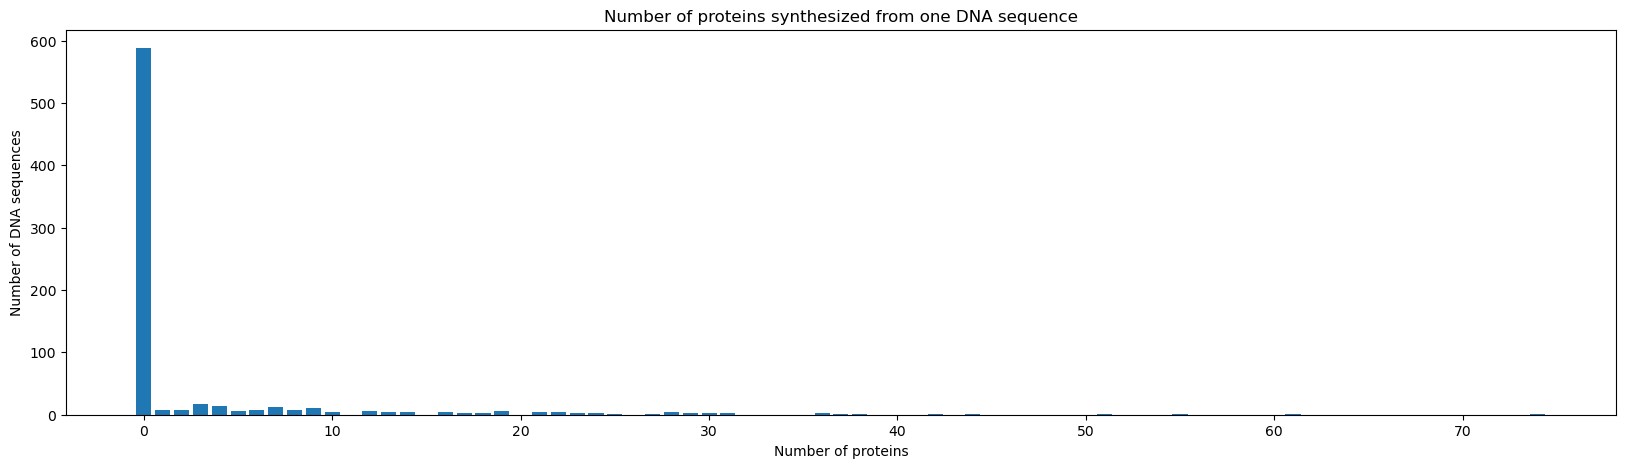

In [14]:
barplot_proteins_number(results_df)

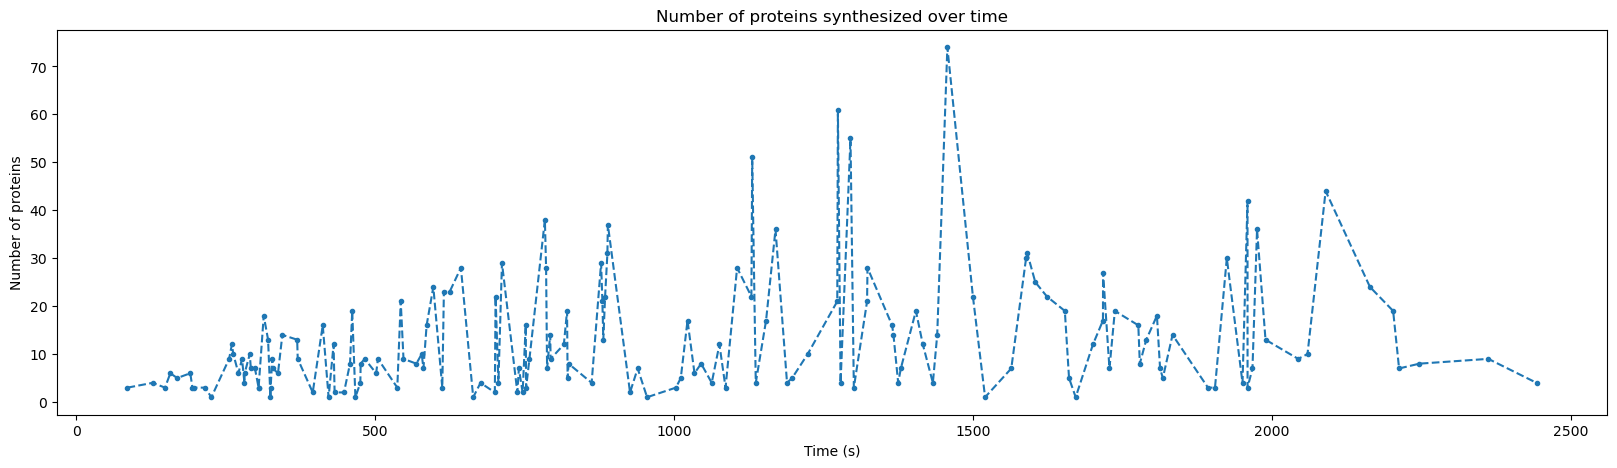

In [15]:
plot_proteins_number_over_time(results_df)

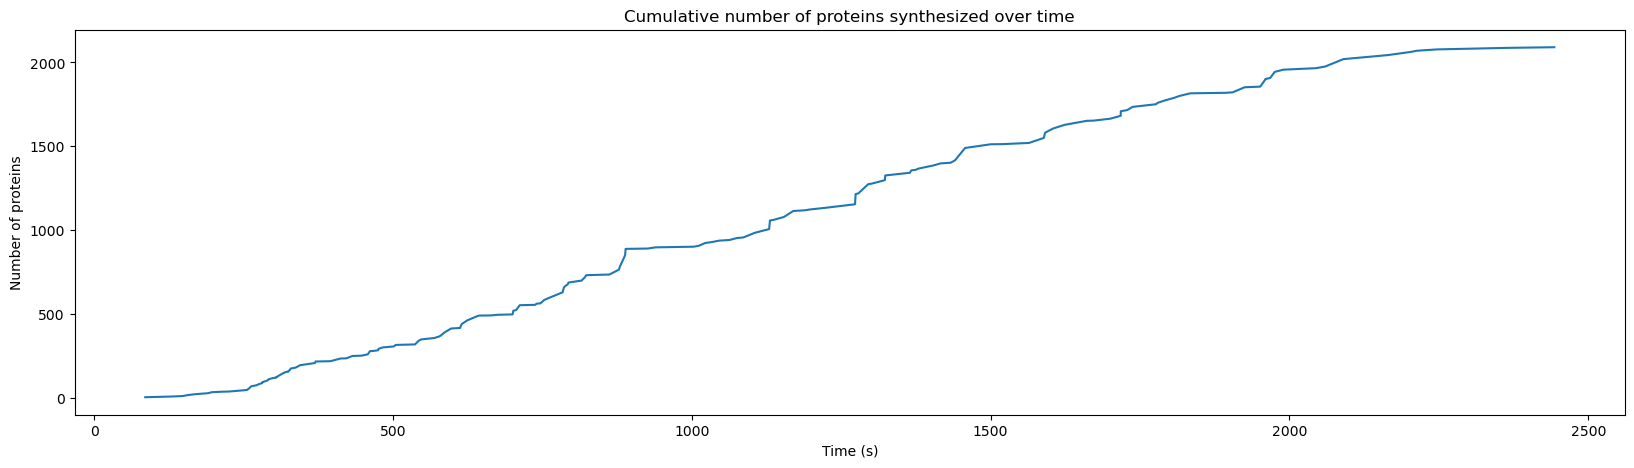

In [16]:
plot_cumulative_proteins_number_over_time(results_df)

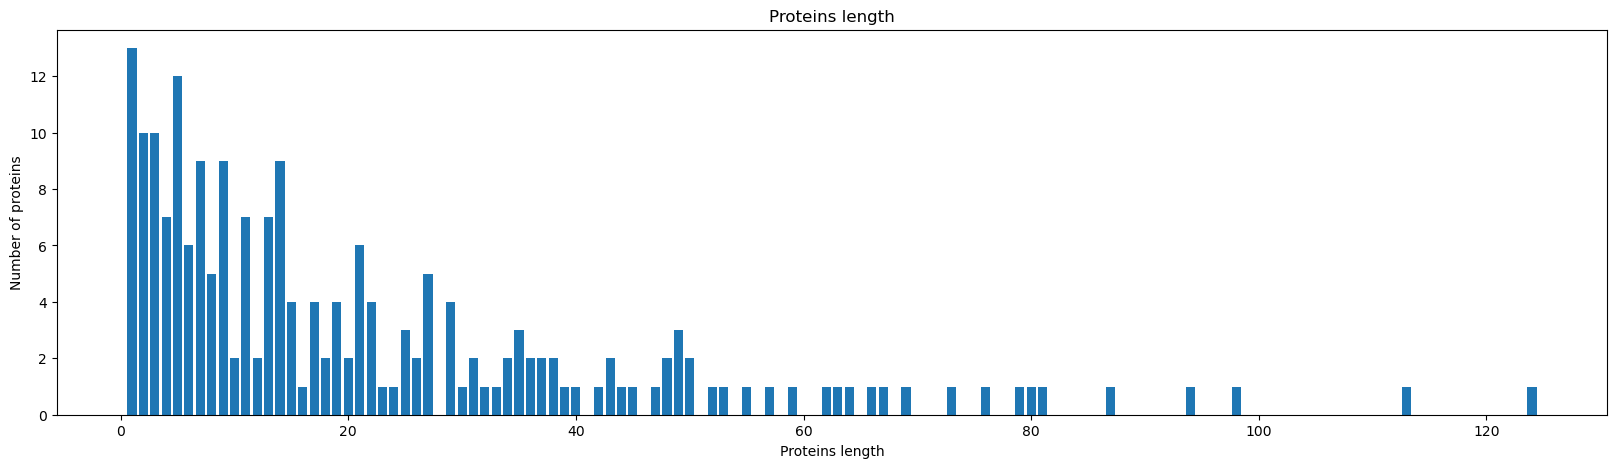

In [17]:
barplot_proteins_length(results_df)

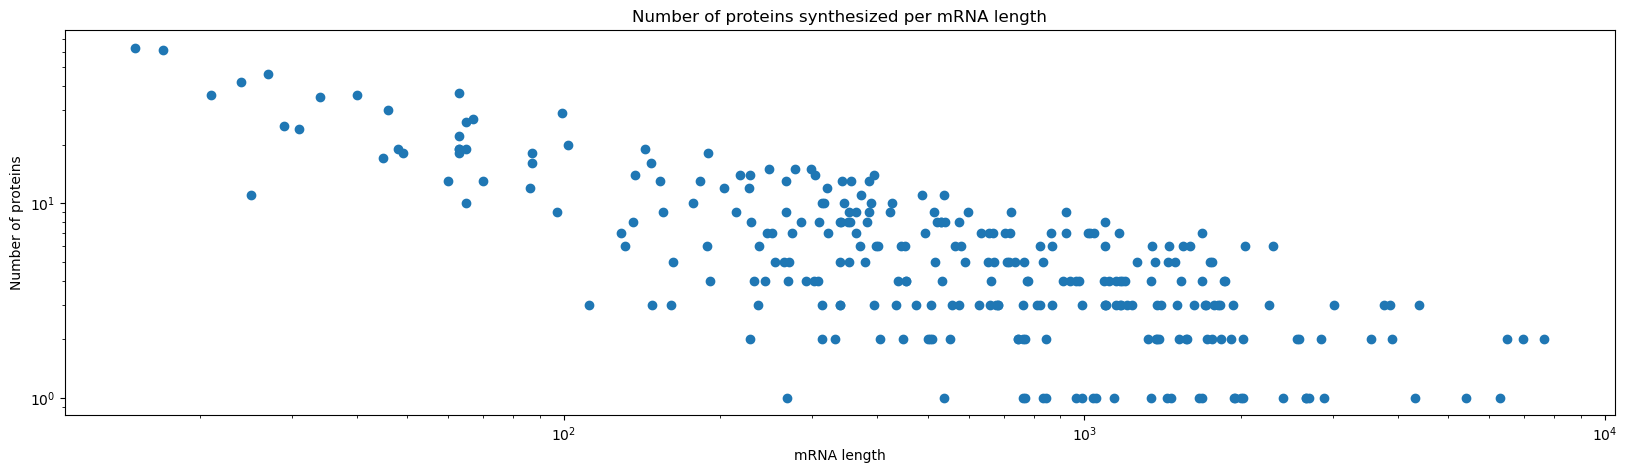

In [18]:
plot_number_proteins_per_length_mrna(results_df)

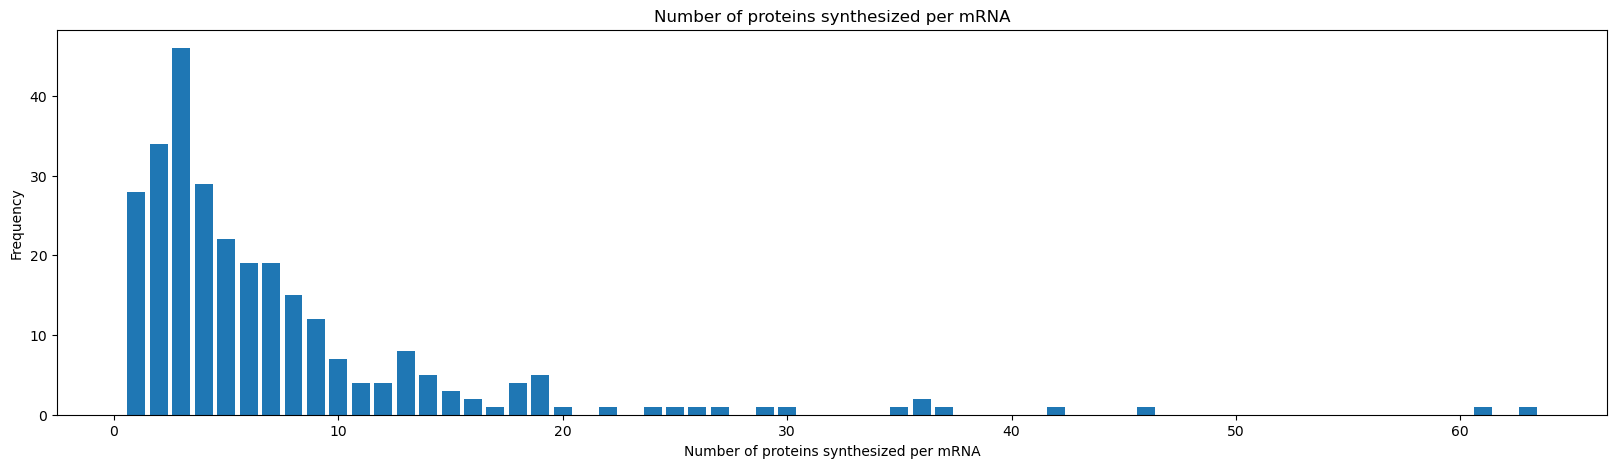

In [19]:
barplot_number_proteins_per_mrna(results_df)

### Process time

Whole process:

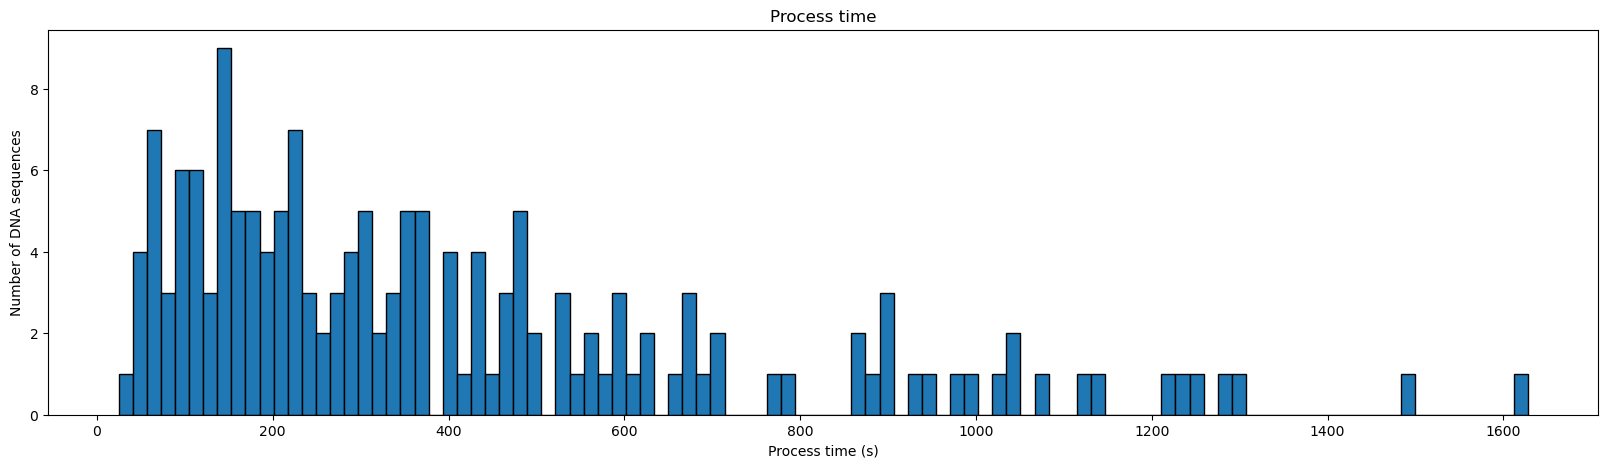

In [20]:
hist_process_time(results_df)

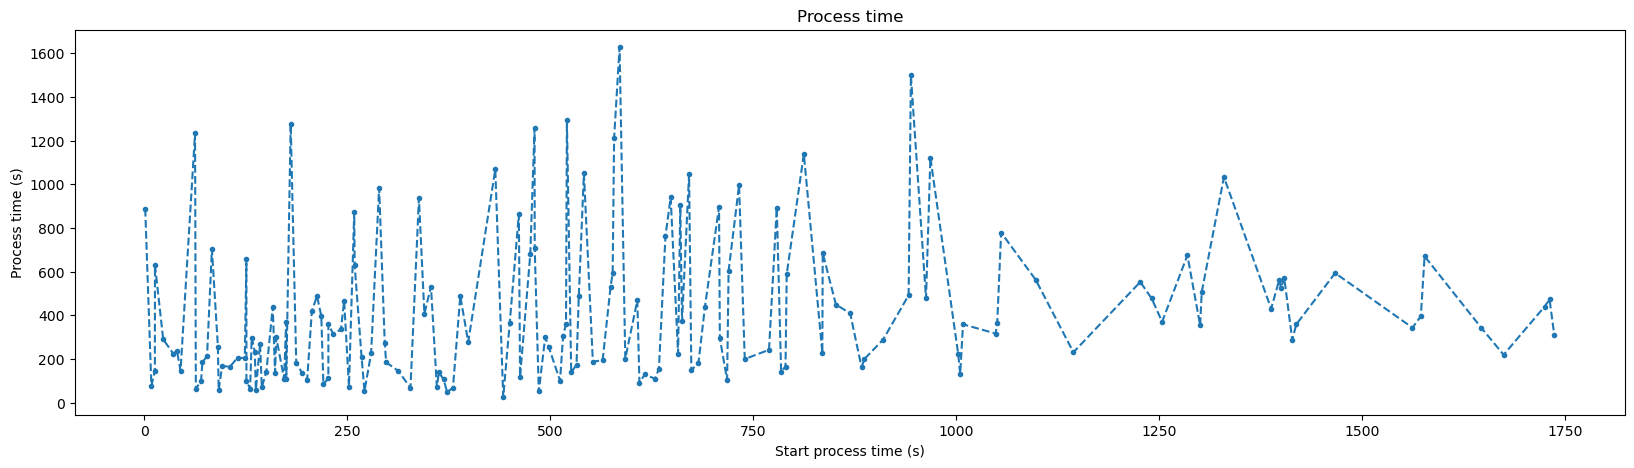

In [21]:
plot_process_time(results_df)

mRNA lifetime:

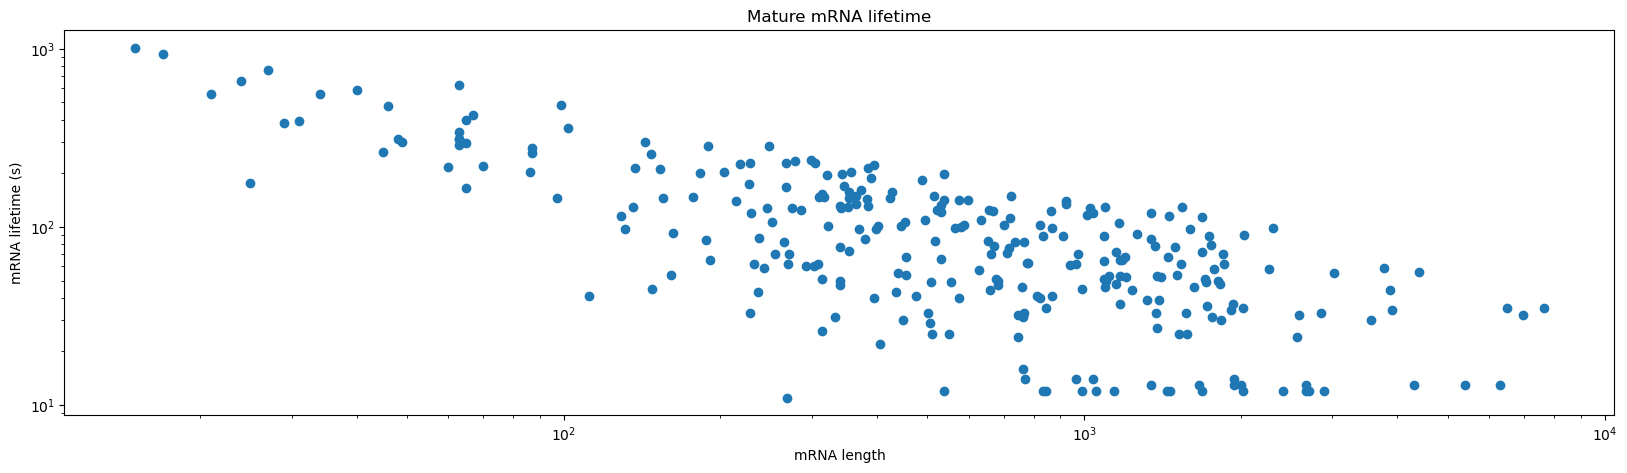

In [22]:
plot_mrna_lifetime(results_df)

### Nucleotides Level

In [23]:
import json

with open('results/test/nucleotides/nucleotides_history_uracil.json') as f:
    uracil_dict = json.load(f)

with open('results/test/nucleotides/nucleotides_history_adenine.json') as f:
    adenine_dict = json.load(f)

with open('results/test/nucleotides/nucleotides_history_guanine.json') as f:
    guanine_dict = json.load(f)

with open('results/test/nucleotides/nucleotides_history_cytosine.json') as f:
    cytosine_dict = json.load(f)

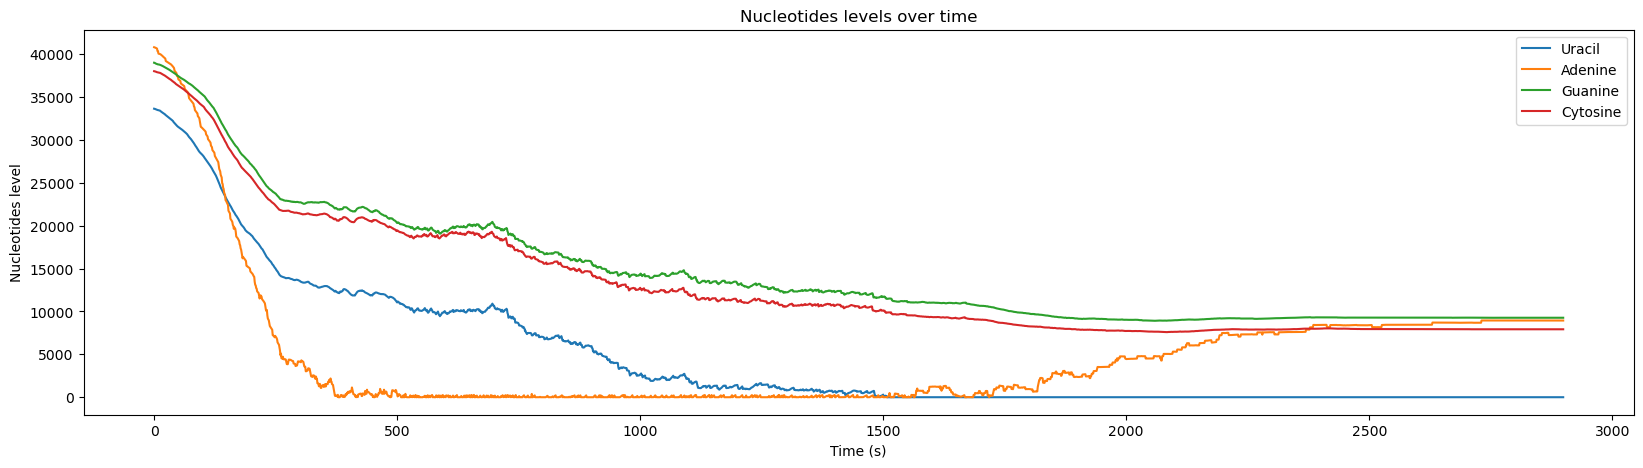

In [24]:
plot_nucleotide_level_over_time(uracil_dict, adenine_dict, guanine_dict, cytosine_dict, time_unit=1)

### RNA Polymerase

In [25]:
with open('results/'+TEST_NAME+'/rna_polymerase_history.json') as f:
    rna_polymerase_dict = json.load(f)

In [26]:
rna_polymerase_df = dict_to_dataframe(rna_polymerase_dict)

In [27]:
rna_polymerase_df.describe() # values in seconds

queue  request_time  available_time  wait_time     end_time  usage_time
count  417.0    417.000000      417.000000      417.0   417.000000  417.000000
mean     0.0    615.001929      615.001929        0.0   828.846795    4.190121
std      0.0    328.240554      328.240554        0.0   560.836089   10.486813
min      0.0      0.000000        0.000000        0.0     7.943300    0.007700
25%      0.0    353.198000      353.198000        0.0   374.410100    0.773000
50%      0.0    599.820500      599.820500        0.0   693.376300    1.971100
75%      0.0    895.814000      895.814000        0.0  1247.894300    3.851700
max      0.0   1211.803600     1211.803600        0.0  2591.845100  129.031200

### Ribosome

In [28]:
with open('results/'+TEST_NAME+'/ribosome_history.json') as f:
    ribosome_dict = json.load(f)

In [29]:
ribosome_df = dict_to_dataframe(ribosome_dict)

In [30]:
ribosome_df.describe()

queue  request_time  available_time  wait_time     end_time  \
count  2807.0   2807.000000     2807.000000     2807.0  2807.000000   
mean      0.0    948.909165      948.909165        0.0   960.759999   
std       0.0    564.544133      564.544133        0.0   564.449069   
min       0.0      7.943300        7.943300        0.0    19.522300   
25%       0.0    486.547650      486.547650        0.0   498.181100   
50%       0.0    841.200600      841.200600        0.0   853.260000   
75%       0.0   1384.235700     1384.235700        0.0  1395.466200   
max       0.0   2709.972300     2709.972300        0.0  2721.124300   

        usage_time  
count  2807.000000  
mean      0.929681  
std       1.479763  
min       0.000400  
25%       0.205850  
50%       0.519400  
75%       1.100650  
max      15.418000

Resources request wait time:

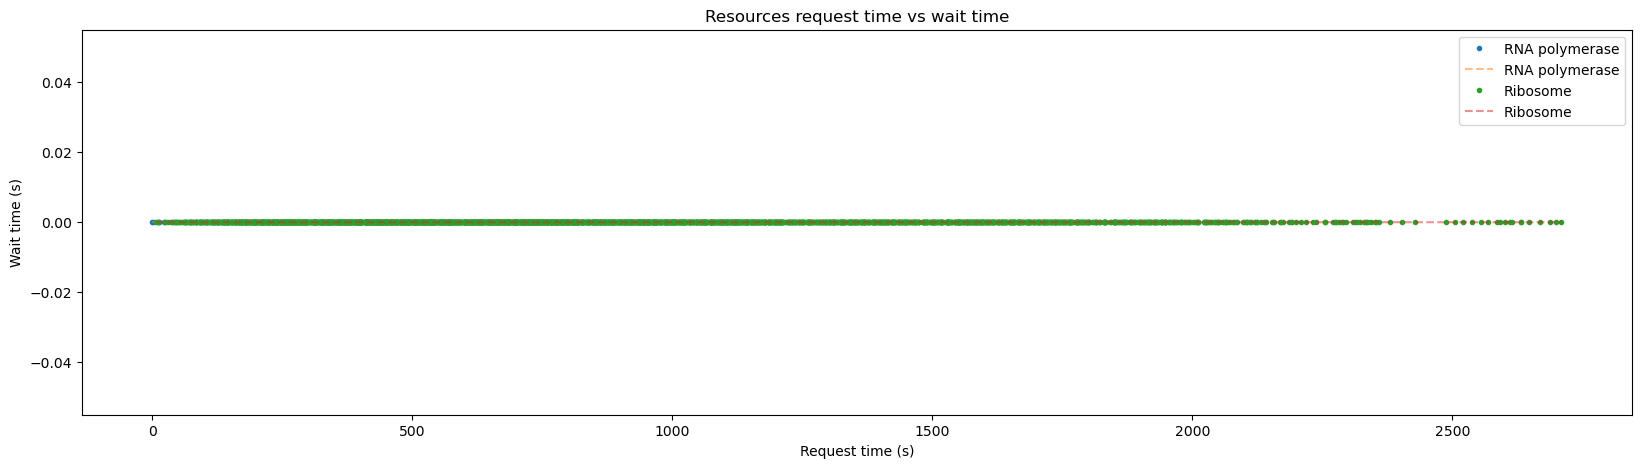

In [31]:
resources_request_wait_time(rna_polymerase_df, ribosome_df)

### Transfer RNA

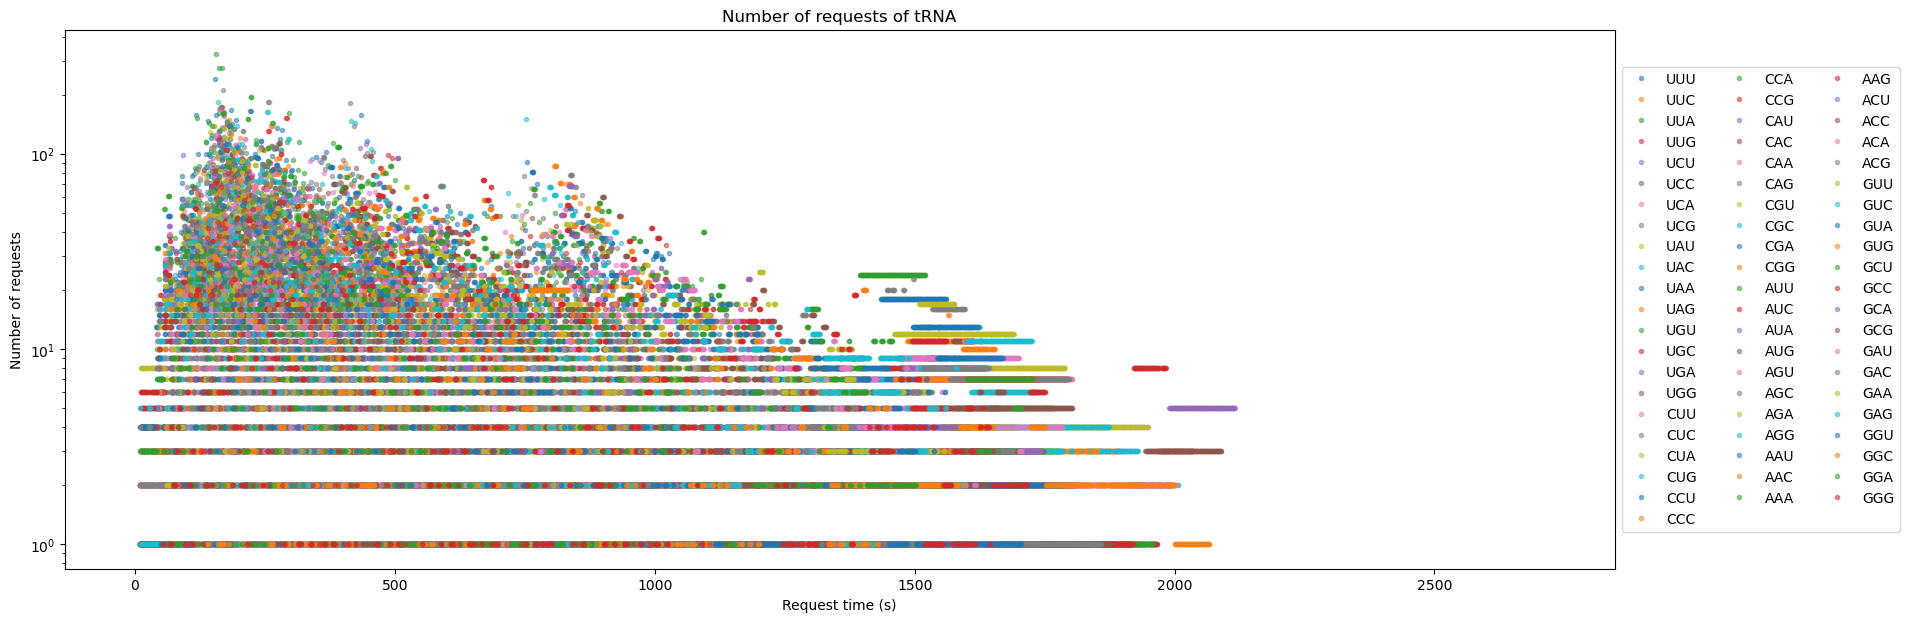

In [32]:
plot_codons_request(file_path='results/'+TEST_NAME+'/rna_transfer/', time_unit=1)

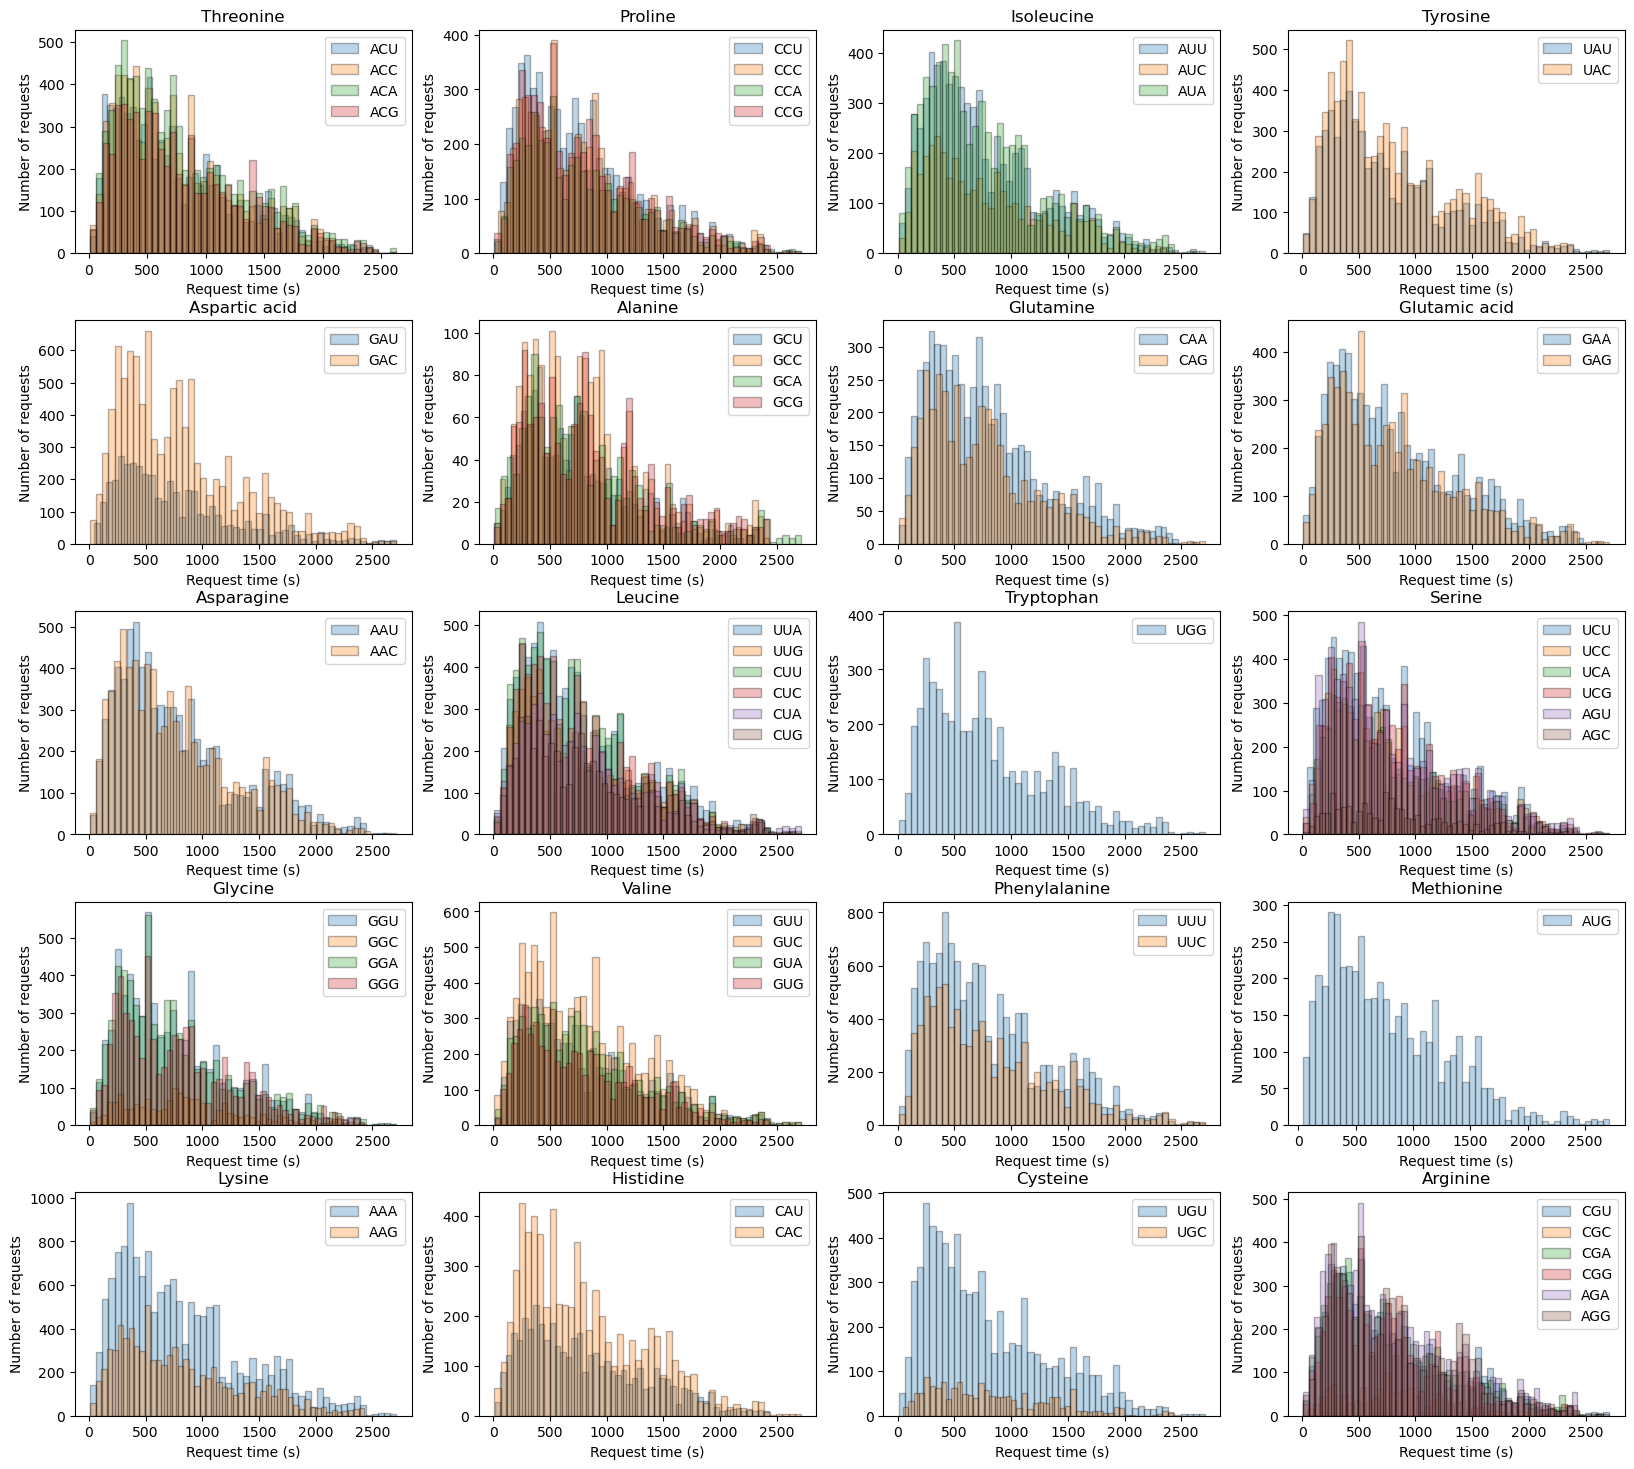

In [33]:
plot_codons_request_per_aminoacid(file_path='results/'+TEST_NAME+'/rna_transfer/', time_unit=1)